<a href="https://colab.research.google.com/github/MarinaIMadh/Computer_Vision/blob/main/M1_exercise_solution/ex1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Load the built-in image 'coffee' of the skimage libraries.

<ipython-input-45-fc9754992947>:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(coffee_image) # visualize image using imshow function
<ipython-input-45-fc9754992947>:9: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


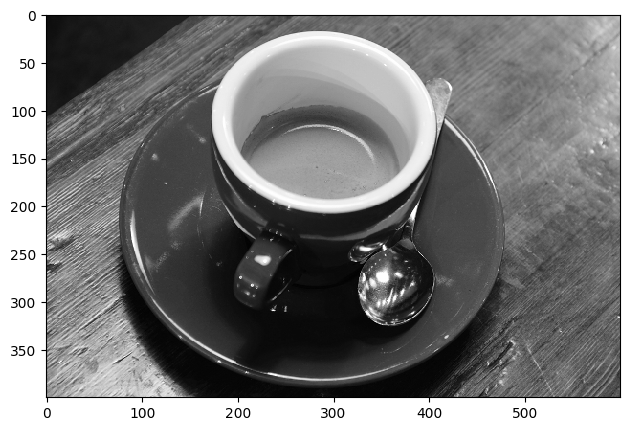

In [45]:
import matplotlib.pyplot as plt
from skimage import data, io, color

image = data.coffee()

coffee_image = color.rgb2gray(image)

io.imshow(coffee_image) # visualize image using imshow function
io.show()

# Display the image
# plt.figure(figsize=(4, 2))
# plt.imshow(coffee_image)
# plt.show()

 Task 2: Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions. The noise types are:

    ‘gaussian’ Gaussian-distributed additive noise.
    ‘localvar’ Gaussian-distributed additive noise, with specified local variance at each point of image.
    ‘poisson’ Poisson-distributed noise generated from the data.
    ‘salt’ Replaces random pixels with 1.
    ‘pepper’ Replaces random pixels with 0 (for unsigned images) or -1 (for signed images).
    ‘s&p’ Replaces random pixels with either 1 or low_val, where low_val is 0 for unsigned images or -1 for signed images.
    ‘speckle’ Multiplicative noise using out = image + n*image, where n is Gaussian noise with specified mean & variance.


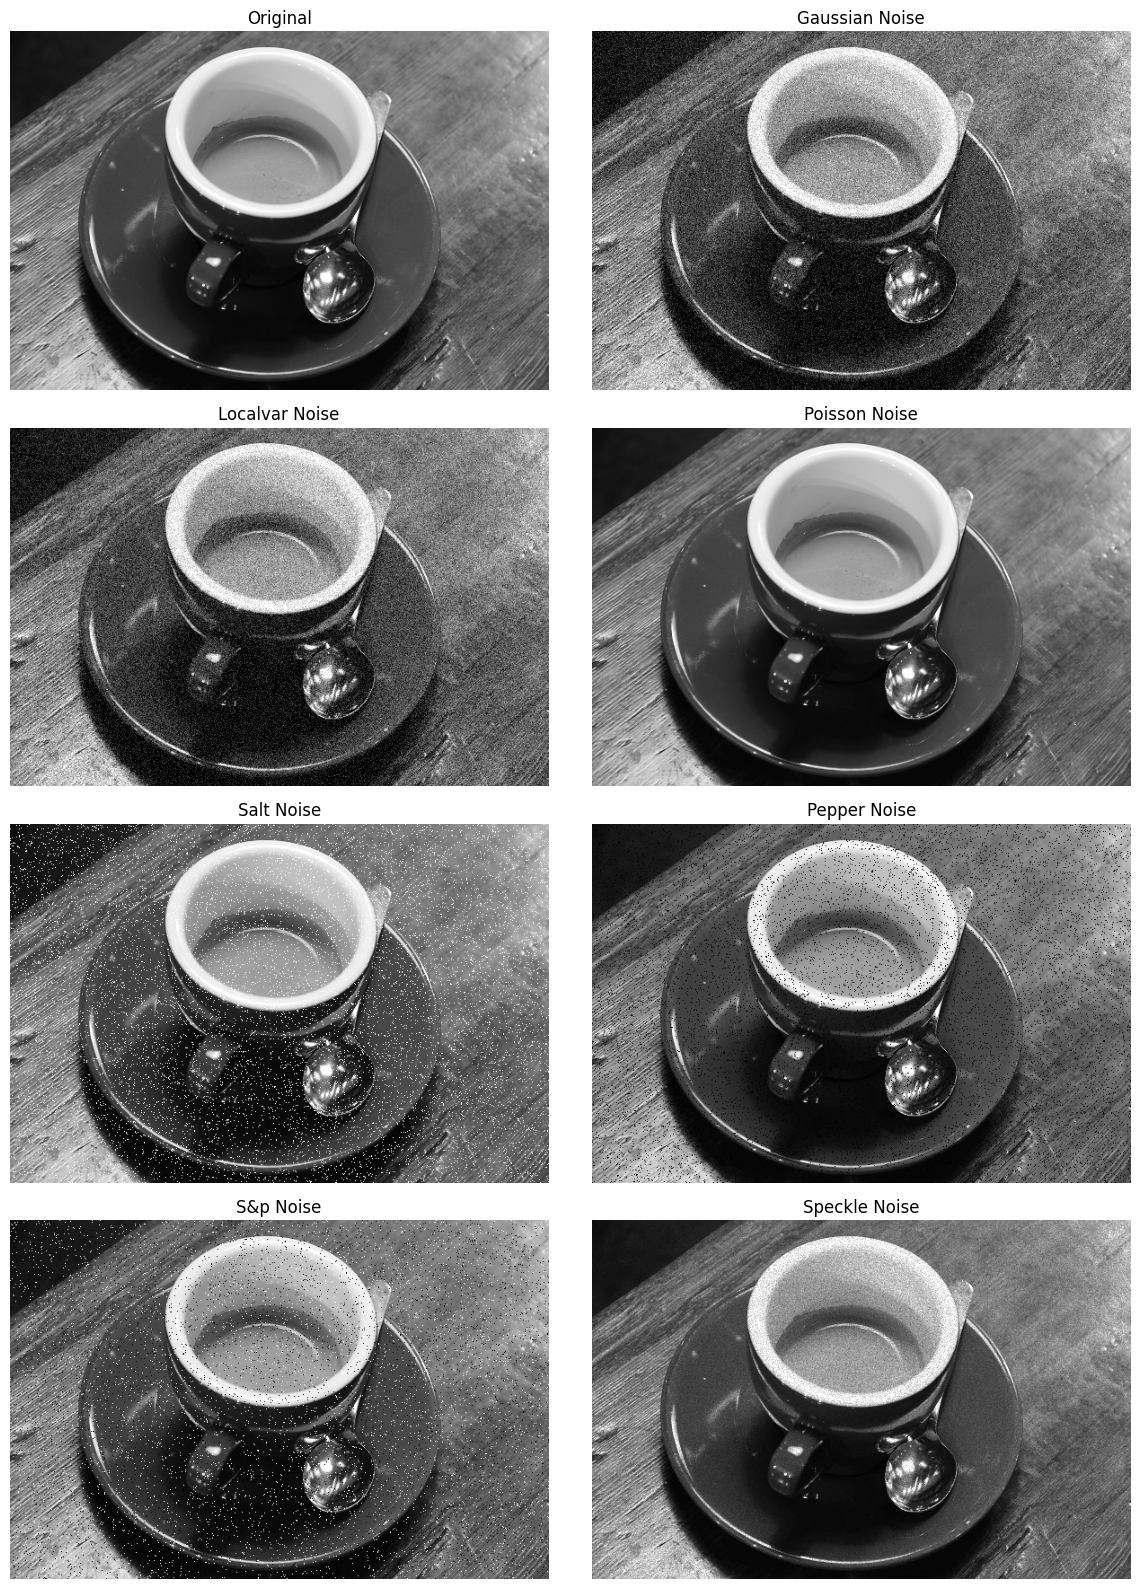

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, util, img_as_ubyte

# List of all supported noise types
noise_types = ['gaussian', 'localvar', 'poisson', 'salt', 'pepper', 's&p', 'speckle']

fig, axes = plt.subplots(4, 2, figsize=(12,16))
axes = axes.ravel()

# Show original image in the first subplot
axes[0].imshow(coffee_image, cmap="gray")
axes[0].set_title("Original")
axes[0].axis('off')

# Loop through each noise type
for i, noise_type in enumerate(noise_types, start=1):

    # Add noise
    if noise_type == 'localvar':
        local_variance = np.full(coffee_image.shape, 0.01)
        noisy = util.random_noise(coffee_image, mode=noise_type, local_vars=local_variance)
    else:
        noisy = util.random_noise(coffee_image, mode=noise_type)

    # Display the noisy image
    axes[i].imshow(noisy, cmap="gray")
    axes[i].set_title(noise_type.capitalize() + " Noise")
    axes[i].axis('off')

# Hide any unused subplots (in this case, none)
for j in range(len(noise_types) + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
